<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/exercises/P1-MovieGenrePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Movie Genre Classification

Classify a movie genre based on its plot.

<img src="https://raw.githubusercontent.com/sergiomora03/AdvancedTopicsAnalytics/main/notebooks/img/moviegenre.png"
     style="float: left; margin-right: 10px;" />



### Data

Input:
- movie plot

Output:
Probability of the movie belong to each genre


### Evaluation

- 30% Report with all the details of the solution, the analysis and the conclusions. The report cannot exceed 10 pages, must be send in PDF format and must be self-contained.
- 30% Code with the data processing and models developed that support the reported results.
- 30% Presentation of no more than 15 minutes with the main results of the project.
- 10% Model performance achieved. Metric: "AUC".

• The project must be carried out in groups of 4 people.
• Use clear and rigorous procedures.
• The delivery of the project is on September 8th, 2023, 11:59 pm, through email.
• No projects will be received after the delivery time or by any other means than the one established.




### Acknowledgements

We thank Professor Fabio Gonzalez, Ph.D. and his student John Arevalo for providing this dataset.

See https://arxiv.org/abs/1702.01992

## Sample Submission

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [3]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [4]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [5]:
# x = dataTraining['plot'].apply(limpiar_data)
# x.head()

### Create count vectorizer


In [6]:
vect = CountVectorizer(max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 1000)

In [7]:
print(list(vect.vocabulary_.keys())[:50])

['most', 'is', 'the', 'story', 'of', 'single', 'father', 'who', 'takes', 'his', 'year', 'old', 'son', 'to', 'work', 'with', 'him', 'at', 'where', 'he', 'day', 'before', 'boy', 'meets', 'woman', 'train', 'drug', 'goes', 'into', 'room', 'and', 'tells', 'stay', 'ship', 'comes', 'though', 'it', 'arrive', 'an', 'later', 'happens', 'sees', 'this', 'tries', 'not', 'able', 'see', 'just', 'as', 'falls']


### Create y

In [8]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [9]:
y_genres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [10]:
y_genres.shape

(7895, 24)

In [11]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

### Train multi-class multi-label model

In [12]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))

In [13]:
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                     random_state=42))

In [14]:
y_pred_genres = clf.predict_proba(X_test)

In [15]:
y_test_genres

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.7812262183677007

# **Librerías**

In [17]:
import nltk
nltk.download("all", quiet=True)

True

In [18]:
#Analisis de data
import matplotlib.pyplot as plt
from collections import Counter


from nltk.corpus import stopwords
from nltk import word_tokenize
import string #puntuacion
from nltk.stem import WordNetLemmatizer #Lematizador

#Vectorizar la data a numeros para que el modelo lo entienda
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
from gensim.models import Word2Vec


#MODELOS
#Búsqueda hiperparametros
from sklearn.model_selection import ParameterGrid

#XGBoost
from xgboost import XGBClassifier

In [19]:
!python -m spacy download en_core_web_sm --quiet
import spacy
import wordcloud

2023-09-09 03:27:54.207256: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-09 03:27:55.351602: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 12.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# **Analisis de Data**

In [ ]:
dataTraining.describe()

,year,rating
count,7895.000000,7895.000000
mean,1989.726409,6.402812
std,22.660717,1.078260
min,1894.000000,1.200000
25%,1980.000000,5.800000
50%,1997.000000,6.500000
75%,2007.000000,7.200000
max,2015.000000,9.300000


Años de creación de peliculas

In [ ]:
dataTraining['year'].min()

1894

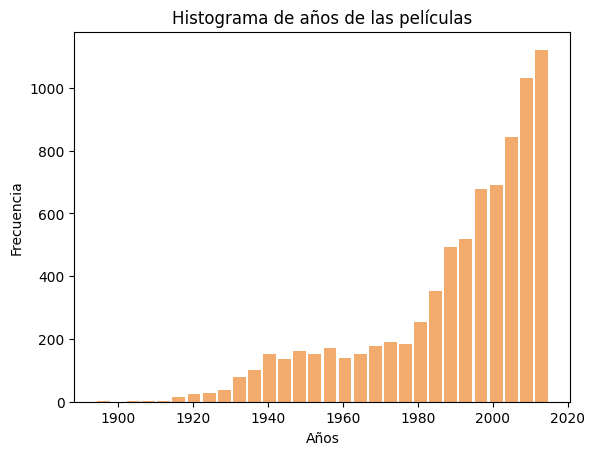

In [ ]:
edades = dataTraining['year']

intervalos = 30 #intervalos

plt.hist(x=edades, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de años de las películas')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
#plot.xticks(intervalos)

plt.show() #dibujamos el histograma

Rating de las películas

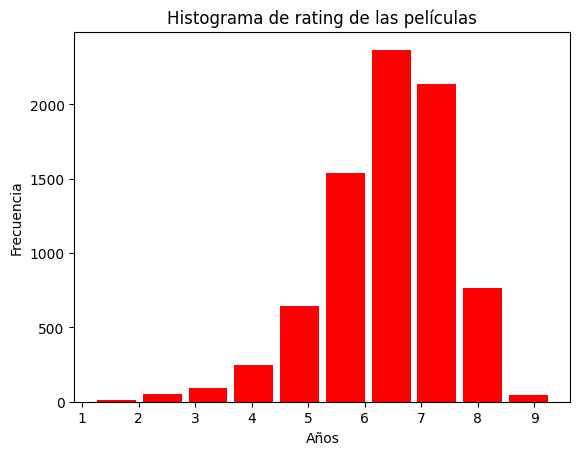

In [ ]:
rating = dataTraining['rating']

intervalos = 10 #intervalos

plt.hist(x=rating, bins=intervalos, color='red', rwidth=0.85)
plt.title('Histograma de rating de las películas')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
#plot.xticks(intervalos)

plt.show() #dibujamos el histograma

Revisión de géneros

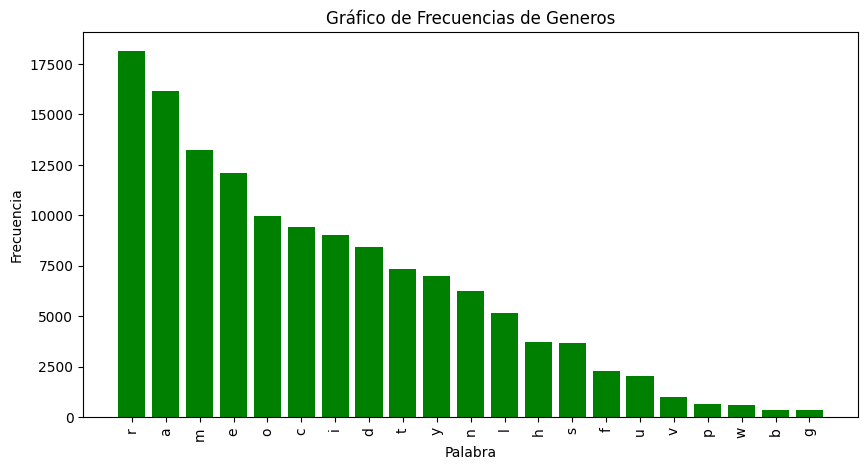

In [ ]:
def quitar(text):
  text = str(text)
  text = ''.join([word for word in text if word not in string.punctuation])
  return text

# Tokenizar los géneros
Generos = pd.DataFrame(dataTraining['genres'].apply(lambda x: [word.lower() for word in x])) # Mostrar el DataFrame con géneros tokenizados
Generos = Generos['genres'].apply(quitar)

p_data = Generos.tolist()

# Combina todos los textos en un solo gran texto
corpus = ' '.join(p_data)

# Tokeniza
tokens = corpus.split()

# Calcula la frecuencia de las palabras sin preprocesar
word_frequency = Counter(tokens)

# Ordena las palabras por frecuencia en orden descendente
sorted_word_frequency = dict(sorted(word_frequency.items(), key=lambda x: x[1], reverse=True))

# Obtén las palabras y sus frecuencias ordenadas
words = list(sorted_word_frequency.keys())
frequencies = list(sorted_word_frequency.values())

# gráfico de barras de frecuencias
plt.figure(figsize=(10, 5))
plt.bar(words[:50], frequencies[:50], color='green')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Frecuencias de Generos')
plt.xticks(rotation=90)
plt.show()



Conocer palabras que más salen

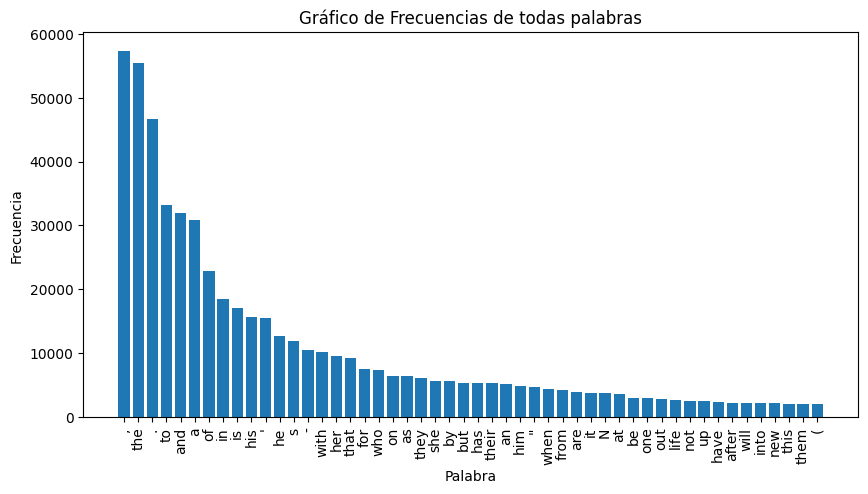

In [ ]:
p_data = dataTraining['plot'].tolist()

# Combina todos los textos en un solo gran texto
corpus = ' '.join(p_data)

# Tokeniza
tokens = corpus.split()

# Calcula la frecuencia de las palabras sin preprocesar
word_frequency = Counter(tokens)

# Ordena las palabras por frecuencia en orden descendente
sorted_word_frequency = dict(sorted(word_frequency.items(), key=lambda x: x[1], reverse=True))

# Obtén las palabras y sus frecuencias ordenadas
words = list(sorted_word_frequency.keys())
frequencies = list(sorted_word_frequency.values())

# gráfico de barras de frecuencias
plt.figure(figsize=(10, 5))
plt.bar(words[:50], frequencies[:50])
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Frecuencias de todas palabras')
plt.xticks(rotation=90)
plt.show()

Conteo de géneros por películas

In [ ]:
def quitar(text):
  text = str(text)
  text = ''.join([word for word in text if word not in string.punctuation])
  return text

def cantidad_gen(vector):
  return len(vector)

# Tokenizar los géneros
genxpeli = pd.DataFrame(dataTraining['genres'].apply(lambda x: [word.lower() for word in x])) # Mostrar el DataFrame con géneros tokenizados
genxpeli = genxpeli['genres'].apply(quitar)
genxpeli = genxpeli.apply(word_tokenize)
genxpeli = genxpeli.apply(cantidad_gen)

#Estadisticas basicas
print(f'El promedio de generos por pelicula es: {genxpeli.mean()}')
print(f'El máximo de generos por pelicula es: {genxpeli.max()}')
print(f'El mínimo de generos por pelicula es: {genxpeli.min()}')

El promedio de generos por pelicula es: 17.372767574414187
El máximo de generos por pelicula es: 65
El mínimo de generos por pelicula es: 3


In [ ]:
genxpeli=pd.DataFrame(genxpeli)
genxpeli

,genres
3107,10
900,17
6724,21
4704,5
2582,19
...,...
8417,13
1592,22
1723,36
7605,41


In [ ]:
# Calcular las frecuencias de las categorías
frecuencias = genxpeli['genres'].value_counts()
print(frecuencias)

11    745
18    676
13    625
6     488
12    463
19    449
5     441
20    383
14    297
25    292
17    263
21    262
16    260
24    251
26    234
28    168
22    167
10    166
27    142
23    138
15    133
31    112
33     83
30     81
8      76
29     72
32     71
35     62
7      55
37     49
34     46
36     28
38     17
42     15
9      14
41     12
40     12
39      9
44      6
43      5
47      5
51      5
49      4
48      3
46      2
52      2
50      1
45      1
65      1
55      1
3       1
53      1
Name: genres, dtype: int64


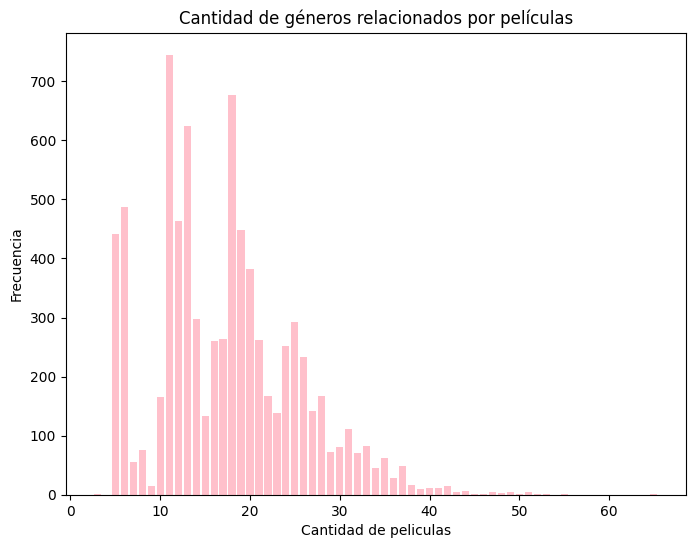

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(frecuencias.index, frecuencias.values, color='pink')

# Agregar etiquetas y título
plt.xlabel('Cantidad de peliculas')
plt.ylabel('Frecuencia')
plt.title('Cantidad de géneros relacionados por películas')

# Mostrar el gráfico
plt.show()

# **Pre Procesamiento**

## ***Revisión de Nulos***

Se revisa si existen nulos dentro de la data presentada

In [20]:
pd.DataFrame(dataTraining.isnull().sum(), columns=['Cantidad de nulos'])

,Cantidad de nulos
year,0
title,0
plot,0
genres,0
rating,0


## ***Pre Procesamiento Paso a Paso de lo que se hará en el código***

A continuación se mostrará el paso a paso de cómo funcionaría la funcón que pre procesará la data deseada

A continuación se presenta el código de todo el preprocesamiento que se le realizará a la data, para tal motivo se empleará sólo una película.

In [21]:
#Tomar una película de ejemplo
pelicula_ejemplo = dataTraining['plot'][0]
pelicula_ejemplo

"major benson winifred payne is being discharged from the marines .  payne is a killin '  machine ,  but the wars of the world are no longer fought on the battlefield .  a career marine ,  he has no idea what to do as a civilian ,  so his commander finds him a job  -  commanding officer of a local school ' s jrotc program ,  a bunch or ragtag losers with no hope .  using such teaching tools as live grenades and real bullets ,  payne starts to instill the corp with some hope .  but when payne is recalled to fight in bosnia ,  will he leave the corp that has just started to believe in him ,  or will he find out that killin '  ain ' t much of a livin '  ?"

Primero se pará todo a minúscula

In [22]:
pelicula_ejemplo = pelicula_ejemplo.lower()
pelicula_ejemplo

"major benson winifred payne is being discharged from the marines .  payne is a killin '  machine ,  but the wars of the world are no longer fought on the battlefield .  a career marine ,  he has no idea what to do as a civilian ,  so his commander finds him a job  -  commanding officer of a local school ' s jrotc program ,  a bunch or ragtag losers with no hope .  using such teaching tools as live grenades and real bullets ,  payne starts to instill the corp with some hope .  but when payne is recalled to fight in bosnia ,  will he leave the corp that has just started to believe in him ,  or will he find out that killin '  ain ' t much of a livin '  ?"

Quitar la puntuación

In [23]:
pelicula_ejemplo = ''.join([word for word in pelicula_ejemplo if word not in string.punctuation])
pelicula_ejemplo

'major benson winifred payne is being discharged from the marines   payne is a killin   machine   but the wars of the world are no longer fought on the battlefield   a career marine   he has no idea what to do as a civilian   so his commander finds him a job    commanding officer of a local school  s jrotc program   a bunch or ragtag losers with no hope   using such teaching tools as live grenades and real bullets   payne starts to instill the corp with some hope   but when payne is recalled to fight in bosnia   will he leave the corp that has just started to believe in him   or will he find out that killin   ain  t much of a livin   '

Tokenizar

In [24]:
pelicula_ejemplo = word_tokenize(pelicula_ejemplo)
pelicula_ejemplo

['major',
 'benson',
 'winifred',
 'payne',
 'is',
 'being',
 'discharged',
 'from',
 'the',
 'marines',
 'payne',
 'is',
 'a',
 'killin',
 'machine',
 'but',
 'the',
 'wars',
 'of',
 'the',
 'world',
 'are',
 'no',
 'longer',
 'fought',
 'on',
 'the',
 'battlefield',
 'a',
 'career',
 'marine',
 'he',
 'has',
 'no',
 'idea',
 'what',
 'to',
 'do',
 'as',
 'a',
 'civilian',
 'so',
 'his',
 'commander',
 'finds',
 'him',
 'a',
 'job',
 'commanding',
 'officer',
 'of',
 'a',
 'local',
 'school',
 's',
 'jrotc',
 'program',
 'a',
 'bunch',
 'or',
 'ragtag',
 'losers',
 'with',
 'no',
 'hope',
 'using',
 'such',
 'teaching',
 'tools',
 'as',
 'live',
 'grenades',
 'and',
 'real',
 'bullets',
 'payne',
 'starts',
 'to',
 'instill',
 'the',
 'corp',
 'with',
 'some',
 'hope',
 'but',
 'when',
 'payne',
 'is',
 'recalled',
 'to',
 'fight',
 'in',
 'bosnia',
 'will',
 'he',
 'leave',
 'the',
 'corp',
 'that',
 'has',
 'just',
 'started',
 'to',
 'believe',
 'in',
 'him',
 'or',
 'will',
 'he',

In [25]:
stop_words = set(stopwords.words('english')) #Stopwords
pelicula_ejemplo = [word for word in pelicula_ejemplo if word not in stop_words] #quitando stopwords
pelicula_ejemplo

['major',
 'benson',
 'winifred',
 'payne',
 'discharged',
 'marines',
 'payne',
 'killin',
 'machine',
 'wars',
 'world',
 'longer',
 'fought',
 'battlefield',
 'career',
 'marine',
 'idea',
 'civilian',
 'commander',
 'finds',
 'job',
 'commanding',
 'officer',
 'local',
 'school',
 'jrotc',
 'program',
 'bunch',
 'ragtag',
 'losers',
 'hope',
 'using',
 'teaching',
 'tools',
 'live',
 'grenades',
 'real',
 'bullets',
 'payne',
 'starts',
 'instill',
 'corp',
 'hope',
 'payne',
 'recalled',
 'fight',
 'bosnia',
 'leave',
 'corp',
 'started',
 'believe',
 'find',
 'killin',
 'much',
 'livin']

Lematización de la función

In [26]:
wordnet_lemmatizer = WordNetLemmatizer() #Lematizador
pelicula_ejemplo = [wordnet_lemmatizer.lemmatize(word) for word in pelicula_ejemplo] #devuelve palabras lematizadas
pelicula_ejemplo

['major',
 'benson',
 'winifred',
 'payne',
 'discharged',
 'marine',
 'payne',
 'killin',
 'machine',
 'war',
 'world',
 'longer',
 'fought',
 'battlefield',
 'career',
 'marine',
 'idea',
 'civilian',
 'commander',
 'find',
 'job',
 'commanding',
 'officer',
 'local',
 'school',
 'jrotc',
 'program',
 'bunch',
 'ragtag',
 'loser',
 'hope',
 'using',
 'teaching',
 'tool',
 'live',
 'grenade',
 'real',
 'bullet',
 'payne',
 'start',
 'instill',
 'corp',
 'hope',
 'payne',
 'recalled',
 'fight',
 'bosnia',
 'leave',
 'corp',
 'started',
 'believe',
 'find',
 'killin',
 'much',
 'livin']

Y ya que viene de un DataFrame se debe volver a unir todo para posteriormente hacer el cambio final

In [27]:
' '.join(pelicula_ejemplo)

'major benson winifred payne discharged marine payne killin machine war world longer fought battlefield career marine idea civilian commander find job commanding officer local school jrotc program bunch ragtag loser hope using teaching tool live grenade real bullet payne start instill corp hope payne recalled fight bosnia leave corp started believe find killin much livin'

## ***Función de PreProcesamiento para el Proyecto***

Conociendo lo anterior a continuación se presenta la función consolidada de código para poder ser empleado en el proyecto

In [28]:
#Lemas

stop_words = set(stopwords.words('english')) #Stopwords
wordnet_lemmatizer = WordNetLemmatizer() #Lematizador
def preprocess(text):
    text = text.lower() #eliminar mayusculas
    text = ''.join([word for word in text if word not in string.punctuation]) #quitar puntuación
    tokens = word_tokenize(text) #tokenizando
    tokens = [word for word in tokens if word not in stop_words] #quitando stopwords
    lemas = [wordnet_lemmatizer.lemmatize(word) for word in tokens] #devuelve palabras lematizadas
    return ' '.join(lemas)

data_modificada = dataTraining['plot'].apply(preprocess)

In [29]:
#Stemas

# from nltk import SnowballStemmer
# englishstemmer = SnowballStemmer('english')

# stop_words = set(stopwords.words('english')) #Stopwords
# wordnet_lemmatizer = WordNetLemmatizer() #Lematizador
# def preprocess(text):
#     text = text.lower() #eliminar mayusculas
#     text = ''.join([word for word in text if word not in string.punctuation]) #quitar puntuación
#     tokens = word_tokenize(text) #tokenizando
#     tokens = [word for word in tokens if word not in stop_words] #quitando stopwords
#     lemas = [englishstemmer.stem(w) for w in tokens] #devuelve palabras stemizadas
#     return ' '.join(lemas)

# data_modificada = dataTraining['plot'].apply(preprocess)

In [30]:
data_modificada.head() #Final texto a usar

3107    story single father take eight year old son wo...
900     serial killer decides teach secret satisfying ...
6724    sweden female blackmailer disfiguring facial s...
4704    friday afternoon new york president tredway co...
2582    los angeles editor publishing house carol hunn...
Name: plot, dtype: object

# **Análisis data Post-Limpieza**

Se revisa las palabras que más veces salieron posterior a la limpieza de data

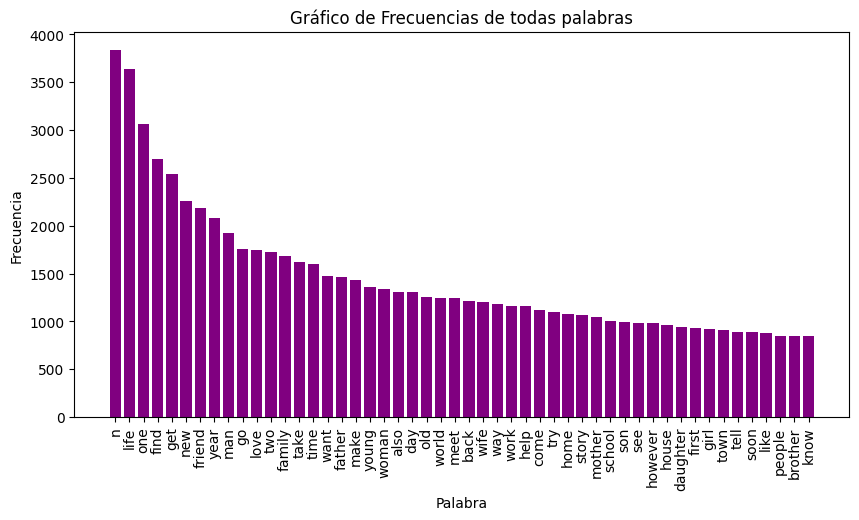

In [ ]:
p_data = data_modificada.tolist()

# Combina todos los textos en un solo gran texto
corpus = ' '.join(p_data)

# Tokeniza
tokens = corpus.split()

# Calcula la frecuencia de las palabras sin preprocesar
word_frequency = Counter(tokens)

# Ordena las palabras por frecuencia en orden descendente
sorted_word_frequency = dict(sorted(word_frequency.items(), key=lambda x: x[1], reverse=True))

# Obtén las palabras y sus frecuencias ordenadas
words = list(sorted_word_frequency.keys())
frequencies = list(sorted_word_frequency.values())

# gráfico de barras de frecuencias
plt.figure(figsize=(10, 5))
plt.bar(words[:50], frequencies[:50], color='purple')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Frecuencias de todas palabras')
plt.xticks(rotation=90)
plt.show()

In [ ]:
model_es = spacy.load("en_core_web_sm")

In [ ]:
peliculas = " ".join(data_modificada.tolist())
peliculas = peliculas[:999999]
doc = model_es(peliculas)
discursos_not_stop = [str(token) for token in doc]

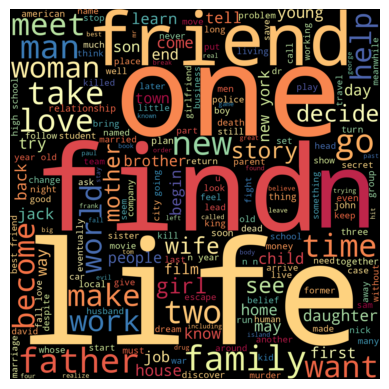

In [ ]:
wc = wordcloud.WordCloud(width=1500, height=1500, colormap="Spectral")
wc.generate(" ".join(discursos_not_stop))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

# **Generar codificación y partición de la data en train y test**

A continaución se muestra la forma de vectorizar el modelo

In [ ]:
#Bag Of Words
vect = CountVectorizer(ngram_range=(1,3), max_features=5000, min_df=3) #hiperparametro los ngramas
X_dtm = vect.fit_transform(data_modificada)

#TFIDF
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=5000, min_df=3) #hiperparametro los ngramas
X_dtm = tfidf.fit_transform(data_modificada).toarray()

#Word2Vec
model = Word2Vec(data_modificada, vector_size=32, window=20, negative=50, min_count=3, workers=4)

X_dtm.shape

In [ ]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

### *Word2Vec*

In [41]:
dataw2v=data_modificada.apply(lambda x: gensim.utils.simple_preprocess(x))
dataw2v.head()

3107    [story, single, father, take, eight, year, old...
900     [serial, killer, decides, teach, secret, satis...
6724    [sweden, female, blackmailer, disfiguring, fac...
4704    [friday, afternoon, new, york, president, tred...
2582    [los, angeles, editor, publishing, house, caro...
Name: plot, dtype: object

In [42]:
# Dividir data ORIGINAL en train y test
X_train, X_test, y_train, y_test = train_test_split(dataw2v, y_genres, test_size=0.33, random_state=42)

Entrenar Word2Vec

In [43]:
# Train the word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

In [44]:
# Generate aggregated sentence vectors based on the word vectors for each word in the sentence
# Replace the words in each text message with the learned word vector
words = set(w2v_model.wv.index_to_key )
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])

<ipython-input-44-728eb4564d7f>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
<ipython-input-44-728eb4564d7f>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])


In [45]:
# Average the word vectors for each sentence (and assign a vector of zeros if the model
# did not learn any of the words in the text message during training
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))

X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

# **Modelamiento**

- XGBoost - Carlos
- Random Forest - Adrian
- Redes LSTM - Dani
- Redes GRU - Yudy

## ***XGBoost***

In [ ]:
#Bag Of Words
vect = CountVectorizer(ngram_range=(1,3), max_features=5000) #hiperparametro los ngramas
X_dtm = vect.fit_transform(data_modificada).toarray()
X_dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

Búsqueda de hiperparámetros

In [ ]:
xgb_param_grid = ParameterGrid(
    {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, None],
    'n_estimators': [50, 100, 200],
    'subsample': [ 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
    }
)

Modelo

In [ ]:
def XGBoost_(params, X_train, y_train, X_test, y_test):
  xgb = OneVsRestClassifier(XGBClassifier(
      n_jobs=-1,
      random_state = 42
      ** params
      ))
  xgb.fit(X_train, y_train)

  y_pred_xgb = xgb.predict_proba(X_test)
  return y_pred_xgb, roc_auc_score(y_test, y_pred_xgb, average='macro')

In [ ]:
#1 a 3 n-gramas y 5000 - Count Vectorize
_, auc = XGBoost_(None, X_train, y_train_genres, X_test, y_test_genres)
print(f"El modelo generó un AUC de: {auc}")

El modelo generó un AUC de: 0.8328083074649252


In [ ]:
#_, auc = XGBoost_(None, X_train_vect_avg, y_train_genres, X_test_vect_avg, y_test_genres)
#2000 y no enegramas - count vectorize
_, auc = XGBoost_(None, X_train, y_train_genres, X_test, y_test_genres)
print(f"El modelo generó un AUC de: {auc}")

El modelo generó un AUC de: 0.8237694088437415


## ***Regresión logística***

In [31]:
#TFIDF
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=2) #hiperparametro los ngramas
X_dtm = tfidf.fit_transform(data_modificada).toarray()
X_train_dtm, X_test_dtm, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

### *Modelo con Word2Vec*

In [46]:
from sklearn.linear_model import LogisticRegression

# Hiperparámetros de la regresión logística
params = {
    'penalty': 'l2',
    'C': 10,
    'solver': 'lbfgs',
    'max_iter': 1000,
}

# Entrenar el modelo
clf = OneVsRestClassifier(LogisticRegression(**params))

clf.fit(X_train_vect_avg, y_train)

# realizar las predicciones
y_pred_genres = clf.predict_proba(X_test_vect_avg)

# Calcular la métrica ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_genres, average='macro')
print('ROC AUC Score:', roc_auc)

ROC AUC Score: 0.709820520621101


### Modelo con TF-IDF

In [34]:
from sklearn.linear_model import LogisticRegression

# Hiperparámetros de la regresión logística
params = {
    'penalty': 'l2',
    'C': 1,
    'solver': 'saga',
    'max_iter': 1000,
}

# Entrenar el modelo
clf = OneVsRestClassifier(LogisticRegression(**params))

clf.fit(X_train_dtm, y_train_genres)

# Realizar las predicciones
y_pred_genres = clf.predict_proba(X_test_dtm)

# Calcular la métrica ROC AUC
roc_auc = roc_auc_score(y_test_genres, y_pred_genres, average='macro')
print('ROC AUC Score:', roc_auc)

ROC AUC Score: 0.8821402478077308


In [ ]:
from sklearn.linear_model import LogisticRegression

# Hiperparámetros de la regresión logística
params = {
    'penalty': 'l1',
    'C': 0.01,
    'solver': 'saga',
    'max_iter': 1000,
}

# Entrenar el modelo
clf = OneVsRestClassifier(LogisticRegression(**params))

clf.fit(X_train_dtm, y_train_genres)

# Realizar las predicciones
y_pred_genres = clf.predict_proba(X_test_dtm)

# Calcular la métrica ROC AUC
roc_auc = roc_auc_score(y_test_genres, y_pred_genres, average='macro')
print('ROC AUC Score:', roc_auc)

## ***LSTM***

In [51]:
!pip install imbalanced-learn --quiet

In [91]:
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPool1D, Embedding, Dropout, Activation, SpatialDropout1D, Bidirectional, LSTM
#from keras.layers.merge import concatenate
from keras.models import Model
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from keras.optimizers import RMSprop, Nadam, Adam
from keras.utils import pad_sequences
%matplotlib inline
%matplotlib inline
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.models import Sequential

from imblearn.over_sampling import SMOTE

### Embedding

In [62]:
X = data_modificada.tolist()
# For vocabulary only the intersec characters is used to avoid issues with data collection
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}
# Max len
max_url_len = 300
X = [x[:max_url_len] for x in X]
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]
X_pad = pad_sequences(X, maxlen=max_url_len)

### *Vesion 1*

In [63]:
columnas = []
for i in range(24):
  columnas.append("col" + str(i))
y_rn=pd.DataFrame(y_genres, columns=columnas)
y_rn.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_rn, test_size=0.33, random_state=42)

In [68]:
embedding_layer = Embedding(len(vocabulary) + 1,
                            128,
    input_length=max_url_len,
    trainable=False)

descriptions = Input(shape=(max_url_len,), dtype='int32')

embedded_sequences= embedding_layer(descriptions)
embedded_sequences = BatchNormalization()(embedded_sequences)
embedded_sequences = SpatialDropout1D(0.3)(embedded_sequences)

x = Bidirectional(LSTM(64, return_sequences=True,kernel_initializer='glorot_uniform'))(embedded_sequences) #CuDNNLSTM
x = GlobalMaxPool1D()(x)
x = Dropout(0.3)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)

preds = Dense(1,activation='sigmoid')(x)

model = Model(inputs=descriptions,outputs=preds)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 300, 128)          7296      
                                                                 
 batch_normalization_2 (Bat  (None, 300, 128)          512       
 chNormalization)                                                
                                                                 
 spatial_dropout1d_2 (Spati  (None, 300, 128)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_1 (Bidirecti  (None, 300, 128)          98816     
 onal)                                                           
                                                           

In [69]:
early_stopping =EarlyStopping(monitor='val_loss', patience=3, mode="min", verbose=1)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [86]:
diccionario = {}
for col in y_rn.columns.to_list():
  diccionario[col] = None #Crear diccionario donde se guardara toda la solucion

for col in y_rn.columns.to_list():

  print("\n")
  print("-"*100)
  print(f"MODELO PARA LA {col}")
  print("-"*100)
  print("\n")

  # creando una instancia de SMOTE
  smote = SMOTE()

  # aplicando SMOTE a los datos
  if col != 'col16':
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train[col])
  else:
    X_resampled, y_resampled = (X_train.copy(), y_train[col].copy())

  model.fit(X_resampled, y_resampled, validation_data=(X_test, y_test[col]), epochs=3, batch_size=64, verbose=0)
  y_predict_n = model.predict(X_test)
  y_pred = np.argmax(y_predict_n, axis = 1) #Pasa a 1 y 0
  diccionario[col] = y_pred
  print(f"Finaliza iteracion para la columna {col} \u2713")



----------------------------------------------------------------------------------------------------
MODELO PARA LA col0
----------------------------------------------------------------------------------------------------


82/82 [==============================] - 9s 116ms/step
Finaliza iteracion para la columna col0 ✓


----------------------------------------------------------------------------------------------------
MODELO PARA LA col1
----------------------------------------------------------------------------------------------------


82/82 [==============================] - 9s 107ms/step
Finaliza iteracion para la columna col1 ✓


----------------------------------------------------------------------------------------------------
MODELO PARA LA col2
----------------------------------------------------------------------------------------------------


82/82 [==============================] - 9s 115ms/step
Finaliza iteracion para la columna col2 ✓


-----------------------------

In [87]:
resultado_rn=pd.DataFrame(diccionario)

In [88]:
roc_auc_score(y_test.values, resultado_rn.values, average='macro')

0.5

### *Version 2*

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_genres, test_size=0.33, random_state=42)

In [92]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_url_len))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(24, activation = "softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 128)          7296      
                                                                 
 spatial_dropout1d_3 (Spati  (None, 300, 128)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_2 (Bidirecti  (None, 300, 256)          263168    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 300, 256)          0         
                                                                 
 batch_normalization_3 (Bat  (None, 300, 256)          1024      
 chNormalization)                                                
                                                        

In [94]:
model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=10)

Epoch 1/10
42/42 [==============================] - 368s 6s/step - loss: 9.8247 - accuracy: 0.1117 - val_loss: 7.9637 - val_accuracy: 0.1926
Epoch 2/10
42/42 [==============================] - 256s 6s/step - loss: 21.7308 - accuracy: 0.2010 - val_loss: 21.2409 - val_accuracy: 0.2375
Epoch 3/10
42/42 [==============================] - 257s 6s/step - loss: 47.1462 - accuracy: 0.1925 - val_loss: 49.8149 - val_accuracy: 0.1289
Epoch 4/10
42/42 [==============================] - 259s 6s/step - loss: 103.5964 - accuracy: 0.1367 - val_loss: 65.8165 - val_accuracy: 0.0652
Epoch 5/10
42/42 [==============================] - 254s 6s/step - loss: 230.7868 - accuracy: 0.1180 - val_loss: 310.5280 - val_accuracy: 0.2183
Epoch 6/10
42/42 [==============================] - 256s 6s/step - loss: 472.6751 - accuracy: 0.1297 - val_loss: 527.6988 - val_accuracy: 0.0100
Epoch 7/10
42/42 [==============================] - 256s 6s/step - loss: 818.9449 - accuracy: 0.1363 - val_loss: 948.7864 - val_accuracy: 0

In [95]:
y_pred_lstm=model.predict(X_test)

82/82 [==============================] - 56s 669ms/step


In [96]:
roc_auc_score(y_test, y_pred_lstm, average='macro')

0.5019285808541188

## ***GRU***

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional,Embedding, GRU, Dense
import tensorflow.keras.layers
from keras.utils import pad_sequences

In [ ]:
X = data_modificada.tolist()
# For vocabulary only the intersec characters is used to avoid issues with data collection
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}
# Max len
max_url_len = 300
X = [x[:max_url_len] for x in X]
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]
X_pad2 = pad_sequences(X, maxlen=max_url_len)

In [ ]:
X_train_GRU, X_test_GRU, y_train, y_test = train_test_split(X_pad2, y_genres, test_size=0.33, random_state=42)

In [ ]:
#Red GRU

model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_url_len))
model.add(Bidirectional(GRU(64)))
model.add(Dense(24, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 128)          7296      
                                                                 
 bidirectional (Bidirection  (None, 128)               74496     
 al)                                                             
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
Total params: 84888 (331.59 KB)
Trainable params: 84888 (331.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Entrenar modelo
model.fit(X_train_GRU, y_train, epochs=10, batch_size=64, validation_data=(X_test_GRU, y_test))

Epoch 1/10
83/83 [==============================] - 36s 428ms/step - loss: 24.7688 - accuracy: 0.2002 - val_loss: 26.0887 - val_accuracy: 0.1926
Epoch 2/10
83/83 [==============================] - 36s 435ms/step - loss: 25.2284 - accuracy: 0.2002 - val_loss: 26.5214 - val_accuracy: 0.1926
Epoch 3/10
83/83 [==============================] - 40s 483ms/step - loss: 25.6767 - accuracy: 0.2002 - val_loss: 27.1421 - val_accuracy: 0.1926
Epoch 4/10
83/83 [==============================] - 36s 441ms/step - loss: 26.2548 - accuracy: 0.2002 - val_loss: 27.7069 - val_accuracy: 0.1926
Epoch 5/10
83/83 [==============================] - 37s 443ms/step - loss: 26.7837 - accuracy: 0.2002 - val_loss: 28.1520 - val_accuracy: 0.1926
Epoch 6/10
83/83 [==============================] - 37s 451ms/step - loss: 27.1890 - accuracy: 0.2002 - val_loss: 28.6548 - val_accuracy: 0.1926
Epoch 7/10
83/83 [==============================] - 36s 426ms/step - loss: 27.8126 - accuracy: 0.2002 - val_loss: 29.2739 - val_ac

In [ ]:
y_pred_GRU=model.predict(X_test_GRU)

82/82 [==============================] - 3s 42ms/step


In [ ]:
roc_auc_score(y_test, y_pred_GRU, average='macro')

0.5041077344159332